In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('csv/insurance2.csv')

In [2]:
dataset.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
#Checking Dimension of Dataframe
dataset.ndim

2

In [5]:
#Checking Shape of Dataframe
dataset.shape

(1338, 8)

In [6]:
#Checking Datatypes of columns of Dataframe
dataset.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
#Checking Nullvalues in the Dataframe
dataset.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Text(0.5, 1.0, 'sex vs Charges')

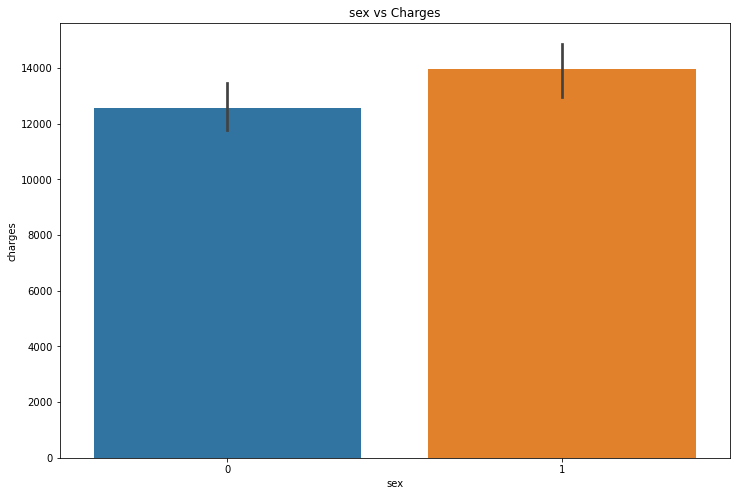

In [8]:
#Plotting Bar Graph using all the features VS “Charges”

plt.figure(figsize = (12, 8))
sns.barplot(x = 'sex', y = 'charges', data = dataset)
plt.title("sex vs Charges")


Text(0.5, 1.0, 'Age vs Charges')

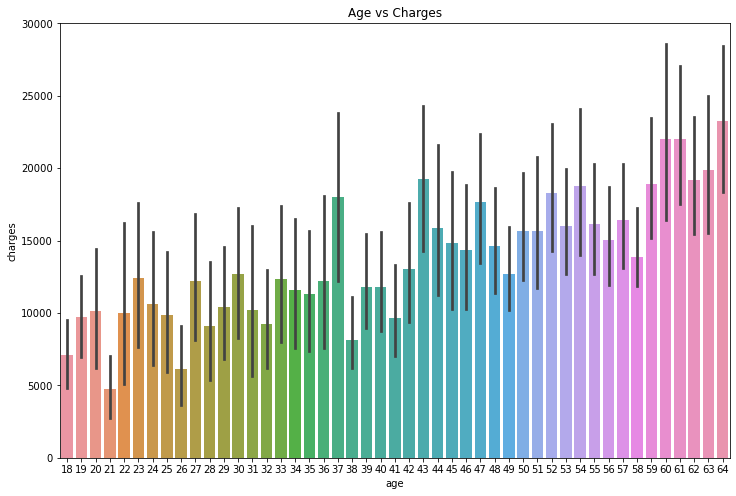

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'bmi vs Charges')

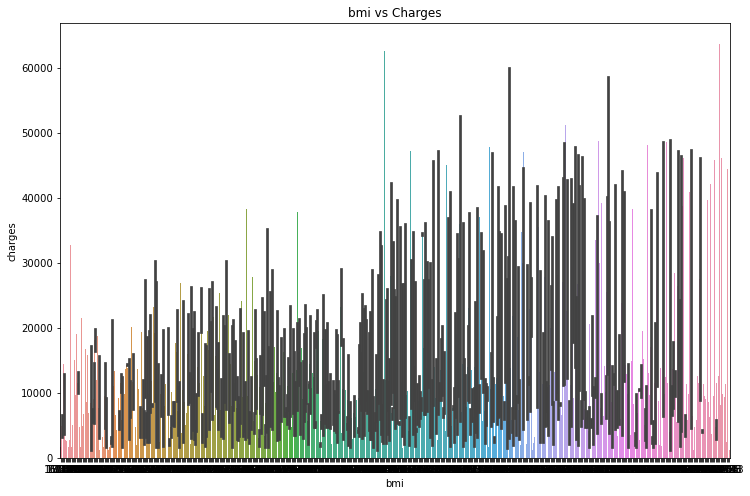

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', data = dataset)
plt.title("bmi vs Charges")

Text(0.5, 1.0, 'children vs Charges')

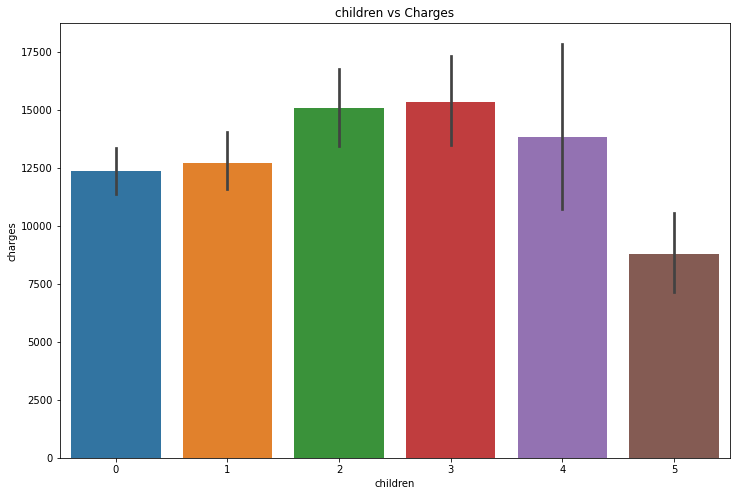

In [12]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)
plt.title('children vs Charges')

Text(0.5, 1.0, 'smoker vs Charges')

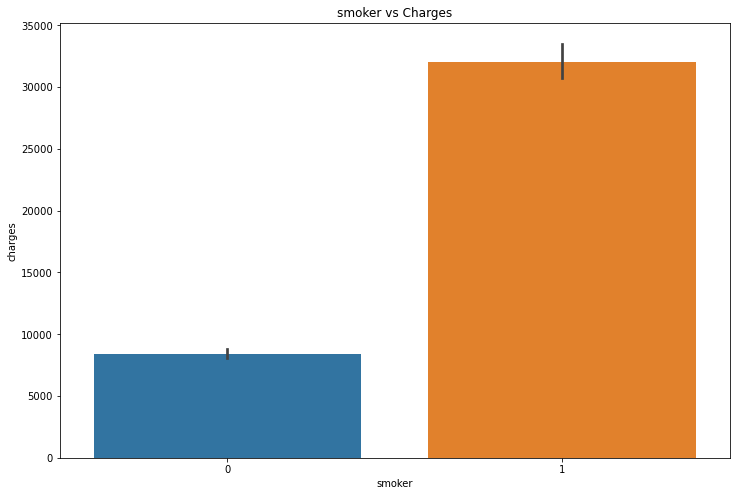

In [13]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)
plt.title("smoker vs Charges")

Text(0.5, 1.0, 'region vs Charges')

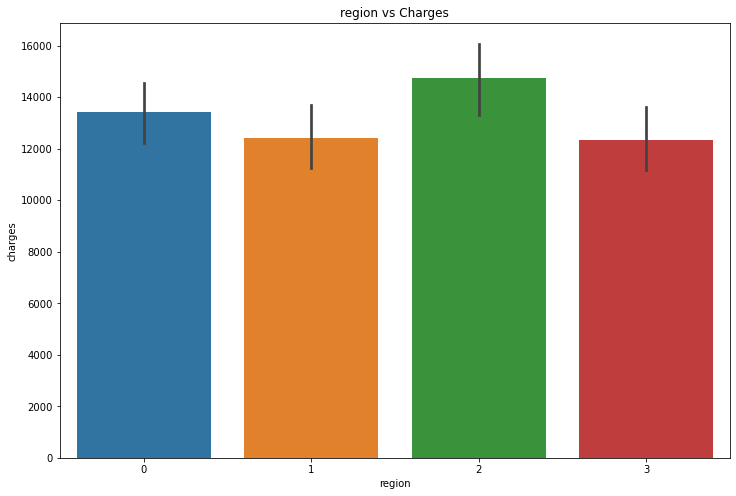

In [14]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)
plt.title("region vs Charges")

In [16]:
#Dropping least important feature of the dataset
dataset = dataset.drop('region', axis = 1)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [23]:
X = dataset.iloc[:,:5]
y = dataset.iloc[:,:5]
print(X.shape)
print(y.shape)

(1338, 5)
(1338, 5)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [26]:
from sklearn.preprocessing import StandardScaler
# creating a standard scaler
sc = StandardScaler()# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
# Linear Regression
from sklearn.linear_model import LinearRegression# creating the Linear Regression model
lR = LinearRegression()# # feeding the training data to the model
lR.fit(X_train, y_train)
y_pred_lR = lR.predict(X_test)
print(y_pred)
lR.score(X_train,y_train)


[[48.      0.8    32.0295  1.      0.    ]
 [29.      0.7    31.12    0.9     0.1   ]
 [33.1     0.9    27.261   1.4     0.3   ]
 ...
 [23.9     0.2    29.641   2.6     0.1   ]
 [47.2     0.8    36.305   1.      0.2   ]
 [32.3     0.1    20.069   0.9     0.1   ]]


1.0

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)# Predicting a new result
y_pred = regressor.predict(X_test)
print(y_pred)
regressor.score(X_train,y_train)

[[48.      0.8    32.0295  1.      0.    ]
 [29.      0.7    31.12    0.9     0.1   ]
 [33.1     0.9    27.261   1.4     0.3   ]
 ...
 [23.9     0.2    29.641   2.6     0.1   ]
 [47.2     0.8    36.305   1.      0.2   ]
 [32.3     0.1    20.069   0.9     0.1   ]]


0.9210212740322893

In [35]:
import pickle
#writng diffrent model file to file
with open('modelinsurance.sav','wb') as f:
    pickle.dump(lR,f)
with open('sandardScalarrr.sav', 'wb') as f:
    pickle.dump(lR,f)

In [42]:
lR.predict([[3,1,1,1,1]])

array([[81.01396249,  1.00279588, 36.7123173 ,  2.30911467,  0.60651495]])